In [1]:
# use Hammett coefficient to derive influence on HOMO-LUMO parameters

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [20]:
# upload SMILES, Hammett para and meta parameters, computed HOMO and LUMO.

df = pd.read_csv("data/hammet_aromatiques.csv")
df = df[df["Hammet sigma m"].isna() == False]
df = df.dropna(axis=1)
df["groups"] = ['Br', 'Cl', 'F', 'Me', 'OMe', 'NH$_2$', 'CN', 'NO$_2$', 'H']
df.reset_index(inplace=True)
df

,index,SMILES,Hammet sigma p (https://pubs.acs.org/doi/abs/10.1021/ja01280a022),Hammet sigma m,HOMO,LUMO,groups
0,0,c1ccccc1Br,0.232,0.391,-0.29203,0.02258,Br
1,1,c1ccccc1Cl,0.227,0.373,-0.29762,0.02365,Cl
2,2,c1ccccc1F,0.062,0.337,-0.29641,0.02728,F
3,3,c1ccccc1C,-0.170,-0.069,-0.28713,0.04089,Me
4,4,c1ccccc1OC,-0.268,0.115,-0.26813,0.03915,OMe
5,5,c1ccccc1N,-0.660,-0.161,-0.24982,0.04441,NH$_2$
6,6,c1ccccc1C#N,1.000,0.678,-0.31906,-0.01535,CN
7,7,c1ccccc1[N+](=O)[O-],0.778,0.710,-0.33211,-0.04538,NO$_2$
8,10,c1ccccc1,0.000,0.000,-0.29915,0.04004,H


/var/folders/c8/7pbzw0r912n01vr9fgdmzhx00000gn/T/ipykernel_40795/697181739.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


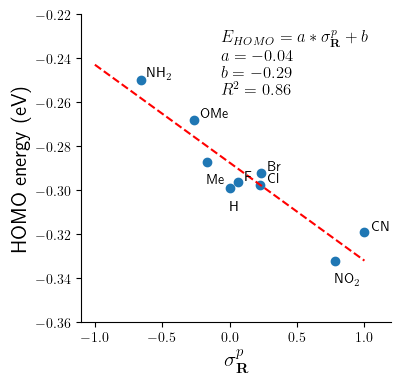

In [34]:
homo    = df["HOMO"]
sigma_p = df["Hammet sigma p (https://pubs.acs.org/doi/abs/10.1021/ja01280a022)"]
groups  = df["groups"]

from sklearn.linear_model import LinearRegression

def regression(X, Y):
    reg = LinearRegression(fit_intercept=True).fit(np.array(X).reshape(-1, 1), np.array(Y).reshape(-1, 1))
    def f(x):
        return reg.coef_[0][0]*x + reg.intercept_[0]
    return f

regr = regression(sigma_p, homo)

from sklearn.metrics import r2_score

r2 = r2_score(homo, [regr(i) for i in sigma_p])

fig1 = plt.figure(figsize=(4, 4))
ax = plt.subplot()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.scatter(sigma_p, homo)
ax.plot([-1, 1], [regr(-1), regr(1)], color='red', linestyle='--')
ax.axis([-1.1, 1.2, -0.36, -0.22])
ax.set_ylabel('HOMO energy (eV)', fontsize=15)
ax.set_xlabel('$\sigma^{p}_{\mathbf{R}}$', fontsize=15)

# create text with regression coefficient and determination coefficient (R2)
textstr = '\n'.join((
    r'$E_{HOMO} = a*\sigma^{p}_{\mathbf{R}} + b$',
    r'$a=%.2f$' % (regr(1)-regr(0)),
    r'$b=%.2f$' % (regr(0)),
    r'$R^{2}=%.2f$' % (r2)))

# add labels to the graph
for i in range(len(groups)):
    if groups[i] not in ['H', 'Me', 'NO$_2$']:
        ax.text(sigma_p[i]+0.05, homo[i]+0.001, groups[i])
    else:
        ax.text(sigma_p[i], homo[i]-0.01, groups[i])


# place a text box in upper left in axes coords
ax.text(0.45, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top')


fig1.show()
fig1.savefig("figures/subfigure_6.png", dpi=300, bbox_inches='tight')